In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
diab = load_diabetes()
# Считайте DataFrame, используя данные функции
df = pd.DataFrame(diab.data, columns=diab.feature_names)
# Добавьте столбец "target" и заполните его данными.
df['target'] = diab.target
# Посмотрим первые пять строк
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
# 1.Формирование обучающей и тестовой выборки
diab_X_train, diab_X_test, diab_y_train, diab_y_test = train_test_split(
    diab.data, diab.target, test_size=0.5, random_state=1)

In [ ]:
# 2. Обучение линейной модели
reg = Lasso(alpha=0.3)
res = reg.fit(diab_X_train, diab_y_train)
res.coef_, res.intercept_

(array([ -0.        ,  -0.        , 575.0875295 , 125.7346587 ,
         -0.        ,   0.        , -83.87295095,   0.        ,
        480.7676955 ,  62.16671981]), 154.7997687430269)

In [ ]:
# Оценка качества модели
r2_score(diab_y_test, res.predict(diab_X_test)), mean_absolute_error(diab_y_test, res.predict(diab_X_test))

(0.4050891755231716, 47.171634222746526)

In [ ]:
# 3. Обучение SVM (SVR)
# Масштабирование данных
sc = MinMaxScaler()
sc_data = sc.fit_transform(diab.data)
sc_data[0]

array([0.66666667, 1.        , 0.58264463, 0.54929577, 0.29411765,
       0.25697211, 0.20779221, 0.28208745, 0.56221737, 0.43939394])

In [ ]:
# Разделение на тестовую и обучающие выборки
diab_X_train1, diab_X_test1, diab_y_train1, diab_y_test1 = train_test_split(
    sc_data, diab.target, test_size=0.5, random_state=1)

# Обучение SVR
svr = SVR(kernel='linear')
svr.fit(diab_X_train1, diab_y_train1)

SVR(kernel='linear')

In [ ]:
# Оценка качества модели
r2_score(diab_y_test1, svr.predict(diab_X_test1)), mean_absolute_error(diab_y_test1, svr.predict(diab_X_test1))

(0.15879727018811718, 56.53104294652049)

In [ ]:
# 4. Обучение дерева решений
dtr = DecisionTreeRegressor(max_depth=5, criterion='poisson')
dtr.fit(diab_X_train, diab_y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5)

In [ ]:
# Оценка качества модели
r2_score(diab_y_test, dtr.predict(diab_X_test)), mean_absolute_error(diab_y_test, dtr.predict(diab_X_test))

(-0.08597154741200375, 63.10922514018489)

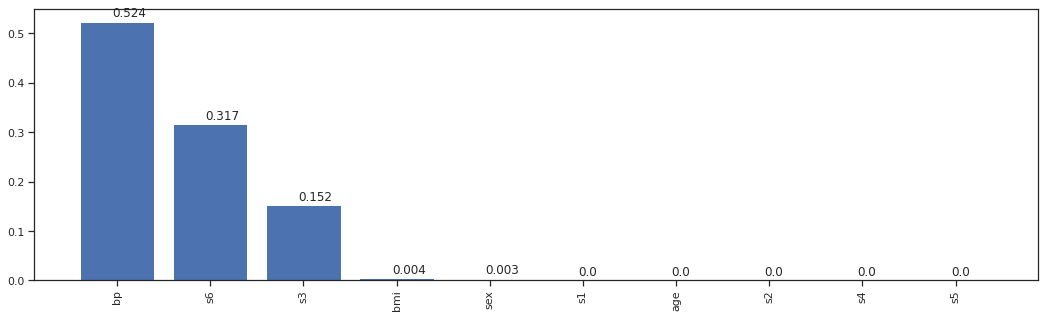

(['bp', 's6', 's3', 'bmi', 'sex', 's1', 'age', 's2', 's4', 's5'],
 [0.523958372242056,
  0.31658580979355483,
  0.152243269742953,
  0.003943312464065008,
  0.003243563645887456,
  2.567211148383762e-05,
  0.0,
  0.0,
  0.0,
  0.0])

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

draw_feature_importances(dtr, df)

In [ ]:
dot_data = export_graphviz(iris_tree_cl, out_file=None, 
                           feature_names=diab.feature_names, 
                           class_names=diab.target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

SyntaxError: ignored

In [1]:
def random_dataset_for_regression():
    """
    Создание случайного набора данных для регрессии
    """
    rng = np.random.RandomState(1)
    X_train = np.sort(5 * rng.rand(80, 1), axis=0)
    y_train = np.sin(X_train).ravel()
    y_train[::5] += 3 * (0.5 - rng.rand(16))
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X_train, y_train, X_test

In [2]:
def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=3)
    regr_2 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()

In [3]:
X_train, y_train, X_test = random_dataset_for_regression()
plot_tree_regression(X_train, y_train, X_test)

NameError: ignored